In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
train_data = np.load('./MNIST/train_data.npy')
test_data = np.load('./MNIST/test_data.npy')
train_labels = np.load('./MNIST/train_labels.npy')
test_labels = np.load('./MNIST/test_labels.npy')

In [17]:
type(test_data)

numpy.ndarray

In [25]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(7500, 784)
(1000, 784)
(7500,)
(1000,)


0
784
9


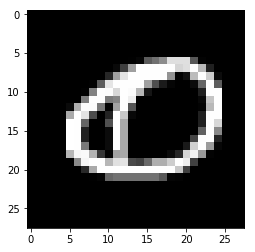

In [65]:
#print(test_data[0])
print(test_labels[0])
plt.imshow(test_data[0].reshape(28,28),cmap='gray')
print(len(train_data[0]))
print(train_labels[0])

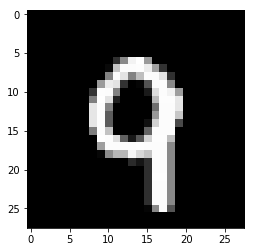

In [66]:
plt.imshow(train_data[0].reshape(28,28),cmap='gray')

In [69]:
# squared distance between two vectors
def get_sq_dist(x,y):
    return np.sum(np.square(x-y))

In [70]:
# distance between upper samples 9 and 0:
get_sq_dist(test_data[0],train_data[0])

8291840.0

6696


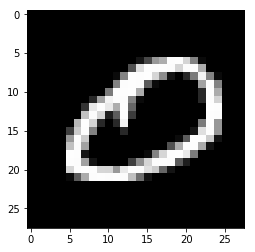

In [73]:
# get index of the NN
ind=np.argmin([get_sq_dist(train_data[i,],test_data[0]) for i in range(len(train_labels))])
print(ind)
plt.imshow(train_data[ind].reshape(28,28),cmap='gray')

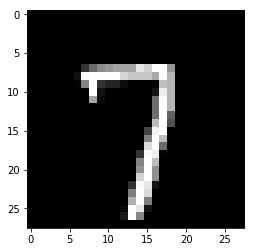

In [74]:
plt.imshow(test_data[145].reshape(28,28),cmap='gray')

384


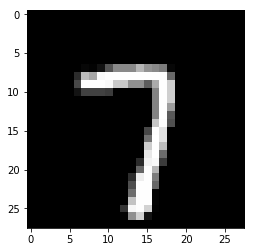

In [76]:
ind=np.argmin([get_sq_dist(train_data[i,],test_data[145]) for i in range(len(train_labels))])
print(ind)
plt.imshow(train_data[ind].reshape(28,28),cmap='gray')

2157


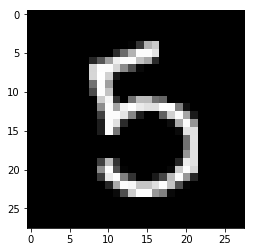

In [78]:
ind=np.argmin([get_sq_dist(train_data[i,],test_data[998]) for i in range(len(train_labels))])
print(ind)
plt.imshow(train_data[ind].reshape(28,28),cmap='gray')

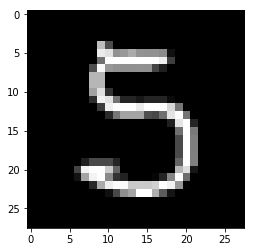

In [79]:
plt.imshow(test_data[998].reshape(28,28),cmap='gray')

In [80]:
import time

In [91]:
def get_NN_idx(x):
    distances = [get_sq_dist(train_data[i,],x) for i in range(len(train_labels))]
    return np.argmin(distances)

In [97]:
def get_NN(x):
    ind = get_NN_idx(x)
    return train_labels[ind]

In [99]:
get_NN(test_data[976])

8

In [100]:
time_start = time.time()
full_test = [get_NN(test_data[j,]) for j in range(len(test_labels))]

In [101]:
time_end = time.time()

In [104]:
print(time_end-time_start)

95.9206793308258


In [105]:
# compute the error
err_positions = np.not_equal(full_test,test_labels)
error = float(np.sum(err_positions))/len(test_labels)
error

0.046

### There are faster methods to perform Nearest Meighbor look up: 
scikit-learn has fast implementations of two useful nearest neighbor data structures: __ball tree__ and __k-d tree__

In [107]:
from sklearn.neighbors import BallTree

## Build nearest neighbor structure on training data
t_before = time.time()
ball_tree = BallTree(train_data)
t_after = time.time()
print(t_after-t_before)

0.7453534603118896


In [114]:
dist,ind = ball_tree.query([test_data[0]],k=1)
ind

array([[6696]], dtype=int64)

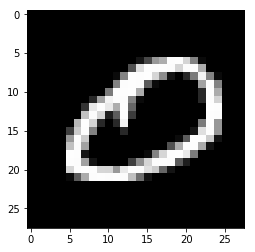

In [117]:
plt.imshow(train_data[6696].reshape(28,28),cmap='gray')

In [118]:
ball_tree.query(test_data,k=1,return_distance=False)

array([[6696],
       [1363],
       [4002],
       [7495],
       [6368],
       [5858],
       [5881],
       [3730],
       [5750],
       [4911],
       [2145],
       [5479],
       [2838],
       [1218],
       [7202],
       [4791],
       [6906],
       [ 348],
       [6657],
       [5533],
       [6843],
       [5305],
       [2779],
       [ 894],
       [3702],
       [3939],
       [ 762],
       [3604],
       [4742],
       [5868],
       [5459],
       [ 357],
       [6733],
       [6914],
       [3632],
       [5463],
       [6265],
       [1468],
       [4293],
       [4455],
       [2448],
       [5553],
       [3974],
       [4405],
       [7384],
       [3374],
       [3941],
       [2014],
       [5146],
       [6492],
       [3148],
       [5340],
       [3811],
       [3931],
       [3123],
       [3469],
       [6264],
       [ 359],
       [1823],
       [7069],
       [4108],
       [3753],
       [3460],
       [2403],
       [4453],
       [1399],
       [28

In [119]:
ball_tree.query(test_data,k=1,return_distance=False).shape

(1000, 1)

In [120]:
np.squeeze(ball_tree.query(test_data,k=1,return_distance=False)).shape

(1000,)

In [121]:
# Get nearest neighbor predictions on testing data
t_before = time.time()
test_neighbors = np.squeeze(ball_tree.query(test_data,k=1,return_distance=False))
ball_tree_predictions = train_labels[test_neighbors]
t_after = time.time()
print('Time to classify test set:',t_after-t_before)
print("Does ball_tree_predictions equal full_test?", 
      np.array_equal(ball_tree_predictions, full_test))

Time to classify test set: 7.248681545257568
Does ball_tree_predictions equal full_test? True


## KD-Tree

In [122]:
from sklearn.neighbors import KDTree

In [124]:
# Build nearest neighbor structure on training data
t_before = time.time()
kd_tree = KDTree(train_data)
t_after = time.time()

## Compute training time
t_training = t_after - t_before
print("Time to build data structure (seconds): ", t_training)

## Get nearest neighbor predictions on testing data
t_before = time.time()
test_neighbors = np.squeeze(kd_tree.query(test_data, k=1, return_distance=False))
kd_tree_predictions = train_labels[test_neighbors]
t_after = time.time()

## Compute testing time
t_testing = t_after - t_before
print("Time to classify test set (seconds): ", t_testing)

## Verify that the predictions are the same
print("KD tree produces same predictions as above? ", 
      np.array_equal(full_test, kd_tree_predictions))

Time to build data structure (seconds):  0.7660520076751709
Time to classify test set (seconds):  9.434754610061646
KD tree produces same predictions as above?  True
